# Решения уравнения фильтрации для постоянного дебита

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

версия 0.1 от 08.10.2021

Решение для бесконечно малого радиуса скважины в пространстве Лапласа будет иметь вид

$$ \tilde{p}_D(s) = \frac{1}{s} K_0 \left( r_D \sqrt s  \right) $$

где 

$K_0$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированная функция Бесселя&nbsp;</a>

Решение для конечного радиуса скважины в пространстве Лапласа будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} $$


Для случая постоянного забойного давления можно получить

$$ \tilde{q}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_1 \left(  \sqrt s  \right) }{K_0 \left(  \sqrt s  \right)} $$


In [1]:
# импортируем библиотки, которые могут пригодиться для проведения расчетов
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
mp.dps = 15; mp.pretty = True

In [21]:
# решение линейного стока в пространстве Лапласа
def pd_line_source_lapl(s, rd=1):
  return 1/s * besselk(0, rd*s**0.5)

# решение конечного радиуса скважины в пространстве Лапласа
def pd_rw_lapl(s, rd=1):
  return 1/s**(3/2) * besselk(0, rd*s**0.5) / besselk(1, s**0.5)


# решение конечного радиуса скважины в пространстве Лапласа
def qd_rw_lapl(s):
  return 1/s**(1/2) * besselk(1, s**0.5) / besselk(0, s**0.5)

In [22]:
# реализация функции расчета безразмерного давления на основе преобразования Лапласа
def pd_line_source(rd, td):
  fp = lambda p: pd_line_source_lapl(p, rd)
  return invertlaplace(fp, td, method='stehfest', degree = 5)

def pd_rw(rd, td):
  fp = lambda p: pd_rw_lapl(p, rd)
  return invertlaplace(fp, td, method='stehfest', degree = 5)

def qd_rw(td):
    return invertlaplace(qd_rw_lapl, td, method='stehfest', degree = 5)

#pd_line_sourse = np.vectorize(pd_line_source_)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

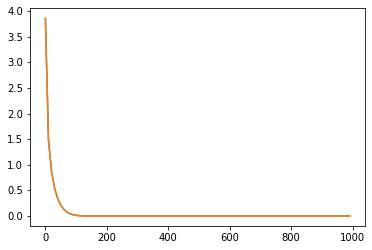

In [16]:
t_d=1000

r_d = np.arange(1, 1000, 10)
p_d = [pd_line_source(ri, t_d) for ri in r_d ]
p_d2 = [pd_rw(ri, t_d) for ri in r_d ]

plt.plot(r_d, p_d)
plt.plot(r_d, p_d2)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

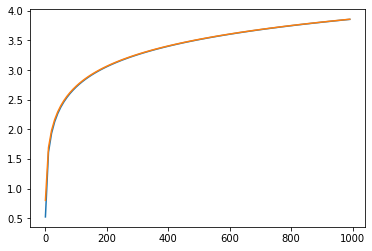

In [18]:
rd=1

td = np.arange(1, 1000, 10)
pd = [pd_line_source(rd, ti) for ti in td ]
pd2 = [pd_rw(rd, ti) for ti in td ]

plt.plot(td, pd)
plt.plot(td, pd2)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

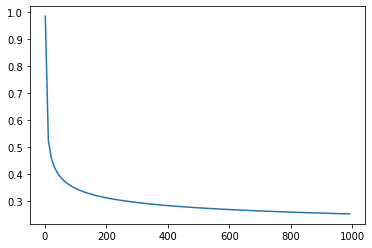

In [23]:
rd=1

td = np.arange(1, 1000, 10)
pd = [qd_rw(ti) for ti in td ]

plt.plot(td, pd)

plt.plot